Aroy Mak Thai Food the best Thai restaurant in Seattle (between 3 competitors)?

Contenders:
1. Aroy Mak Thai Food (https://www.yelp.com/biz/aroy-mak-thai-food-seattle-3?osq=Aroy+Mak+Thai+Food&rr=1#reviews)
2. Isarn Thai Soul Kitchen (https://www.yelp.com/biz/isarn-thai-soul-kitchen-kirkland-2?osq=Isarn+Thai+Soul+Kitchen&rr=1#reviews)
3. Fern Thai on Main (https://www.yelp.com/biz/fern-thai-on-main-bellevue?osq=Fern+Thai+on+Main#reviews)

Rating data retrieved on 5/18/2025.

In [1]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ratings across entire Yelp history
aroy_ratings = np.concatenate([
    np.repeat(5, 229),
    np.repeat(4, 17),
    np.repeat(3, 6),
    np.repeat(2, 0),
    np.repeat(1, 1)
])

isarn_thai_ratings = np.concatenate([
    np.repeat(5, 760),
    np.repeat(4, 328),
    np.repeat(3, 115),
    np.repeat(2, 77),
    np.repeat(1, 83)
])

fern_thai_ratings = np.concatenate([
    np.repeat(5, 420),
    np.repeat(4, 182),
    np.repeat(3, 73),
    np.repeat(2, 28),
    np.repeat(1, 59)
])

In [3]:
# Yelp Ratings are based on mean
print(f'Aroy Mak Thai Food Rating (average): {round(aroy_ratings.mean(),1)}')
print(f'Isarn Thai Soul Kitchen Rating (average): {round(isarn_thai_ratings.mean(),1)}')
print(f'Fern Thai Rating (average): {round(fern_thai_ratings.mean(),1)}')

print(f'Aroy Mak Thai Food Rating (std): {round(aroy_ratings.std(),1)}')
print(f'Isarn Thai Soul Kitchen Rating (std): {round(isarn_thai_ratings.std(),1)}')
print(f'Fern Thai Rating (std): {round(fern_thai_ratings.std(),1)}')


Aroy Mak Thai Food Rating (average): 4.9
Isarn Thai Soul Kitchen Rating (average): 4.2
Fern Thai Rating (average): 4.1
Aroy Mak Thai Food Rating (std): 0.5
Isarn Thai Soul Kitchen Rating (std): 1.2
Fern Thai Rating (std): 1.2


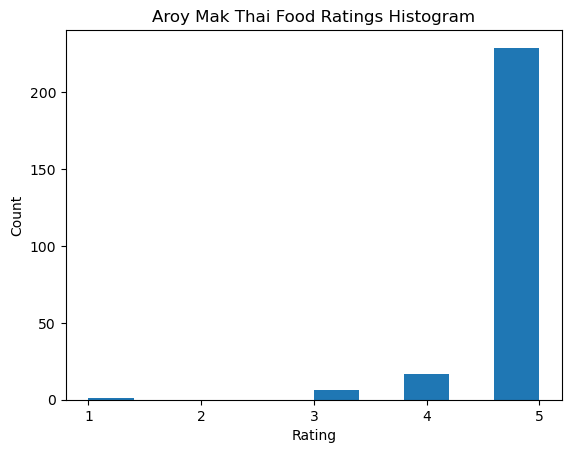

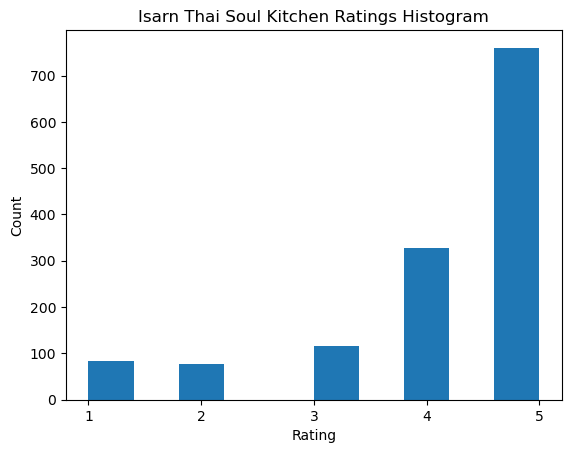

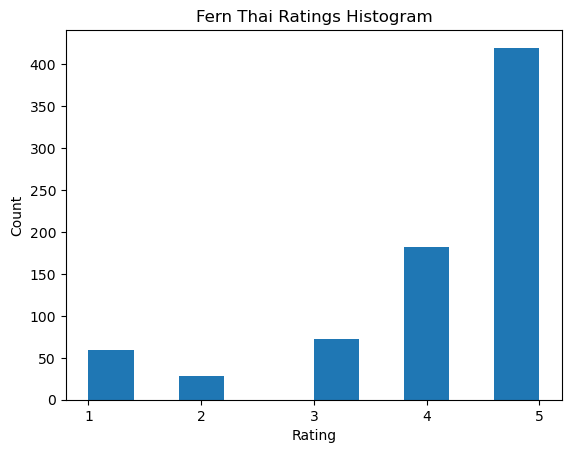

In [4]:
restaurant_names = ['Aroy Mak Thai Food', 'Isarn Thai Soul Kitchen', 'Fern Thai']
restaurant_ratings = [aroy_ratings, isarn_thai_ratings, fern_thai_ratings]

def plot_hist(data, name):
    plt.hist(x=data)
    plt.title(f'{name} Ratings Histogram')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks([1,2,3,4,5])
    plt.show() 

for idx, val in enumerate(restaurant_ratings):
    plot_hist(data=val, name=restaurant_names[idx])

### One-way ANOVA

Null Hypothesis (H0): All restaurants have the same average rating \
Alternative Hypothesis (H1): At least one restaurant has a different mean rating

In [5]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(aroy_ratings, isarn_thai_ratings, fern_thai_ratings)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 43.408
P-value: 0.0000


p-value (0.000) < 0.05 suggests that if the null hypothesis were true, there is a 0.000 chance that this difference exists. Therefore, we reject the null hypothesis that all restaurants have the same average rating. 

### Pairwise T-Test

#### Two-tailed t-test
Null Hypothesis (H0): Restaurant A has the same average rating as Restaurant B \
Alternative Hypothesis (H1): Restaurant A and Restaurant B have different ratings

In [6]:
from scipy.stats import ttest_ind

# Pairwise t-tests (Welch’s t-test for unequal variances)
t_AI, p_AI = ttest_ind(aroy_ratings, isarn_thai_ratings, equal_var=False)
t_AF, p_AF = ttest_ind(aroy_ratings, fern_thai_ratings, equal_var=False)
t_IF, p_IF = ttest_ind(isarn_thai_ratings, fern_thai_ratings, equal_var=False)

print(f"Aroy Mak Thai Food vs Isarn Thai Soul Kitchen → t = {t_AI:.3f}, p = {p_AI:.4f}")
print(f"Aroy Mak Thai Food vs Fern Thai on Main → t = {t_AF:.3f}, p = {p_AF:.4f}")
print(f"Isarn Thai Soul Kitchen vs Fern Thai on Main → t = {t_IF:.3f}, p = {p_IF:.4f}")

Aroy Mak Thai Food vs Isarn Thai Soul Kitchen → t = 16.119, p = 0.0000
Aroy Mak Thai Food vs Fern Thai on Main → t = 13.714, p = 0.0000
Isarn Thai Soul Kitchen vs Fern Thai on Main → t = 0.515, p = 0.6068


1) Aroy Mak Thai Food has a different average rating than both Isarn Thai and Fern Thai with p-values < 0.05 \
2) Isarn Thai and Fern Thai do not have a statistically different rating

#### One-tailed t-test
Null Hypothesis (H0): Aroy Mak has a mean rating less than or equal to Isarn / Fern Thai \
Alternative Hypothesis (H1): Aroy Mak has a higher rating

In [7]:
# One-tailed p-value: divide by 2 and check direction of t-stat
p_AI_one = p_AI / 2 if t_AI > 0 else 1 - (p_AI / 2)
p_AF_one = p_AF / 2 if t_AF > 0 else 1 - (p_AF / 2)

print(f"Aroy > Isarn? t = {t_AI:.3f}, one-tailed p = {p_AI:.4f}")
print(f"Aroy > Fern?  t = {t_AF:.3f}, one-tailed p = {p_AF:.4f}")

Aroy > Isarn? t = 16.119, one-tailed p = 0.0000
Aroy > Fern?  t = 13.714, one-tailed p = 0.0000


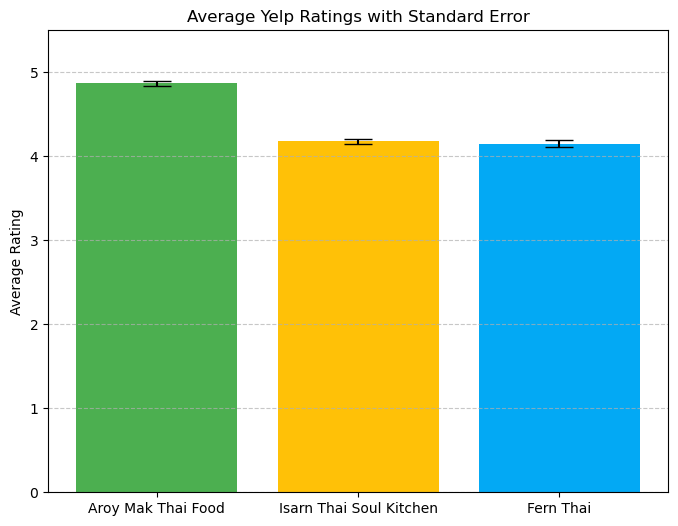

In [8]:
# Compute means and standard errors
means = [np.mean(r) for r in restaurant_ratings]
ses = [np.std(r, ddof=1) / np.sqrt(len(r)) for r in restaurant_ratings]  # standard error of the mean

plt.figure(figsize=(8, 6))
plt.bar(restaurant_names, means, yerr=ses, capsize=10, color=['#4CAF50', '#FFC107', '#03A9F4'])
plt.ylabel('Average Rating')
plt.title('Average Yelp Ratings with Standard Error')
plt.ylim(0, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
def cohens_d(a, b):
    pooled_std = np.sqrt(((np.std(a, ddof=1) ** 2) + (np.std(b, ddof=1) ** 2)) / 2)
    return (np.mean(a) - np.mean(b)) / pooled_std

print("Aroy vs Isarn effect size:", round(cohens_d(aroy_ratings, isarn_thai_ratings),1))
print("Aroy vs Fern effect size:", round(cohens_d(aroy_ratings, fern_thai_ratings),1))

Aroy vs Isarn effect size: 0.8
Aroy vs Fern effect size: 0.8


In [10]:
def bootstrap_ci(data, n_bootstrap=1000, alpha=0.05):
    means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

print("95% CI for Aroy mean:", bootstrap_ci(aroy_ratings))
print("95% CI for Isarn Thai mean:", bootstrap_ci(isarn_thai_ratings))
print("95% CI for Fern Thai mean:", bootstrap_ci(fern_thai_ratings))

95% CI for Aroy mean: (np.float64(4.810276679841897), np.float64(4.92094861660079))
95% CI for Isarn Thai mean: (np.float64(4.113701393983859), np.float64(4.235509904622157))
95% CI for Fern Thai mean: (np.float64(4.05508530183727), np.float64(4.231003937007874))


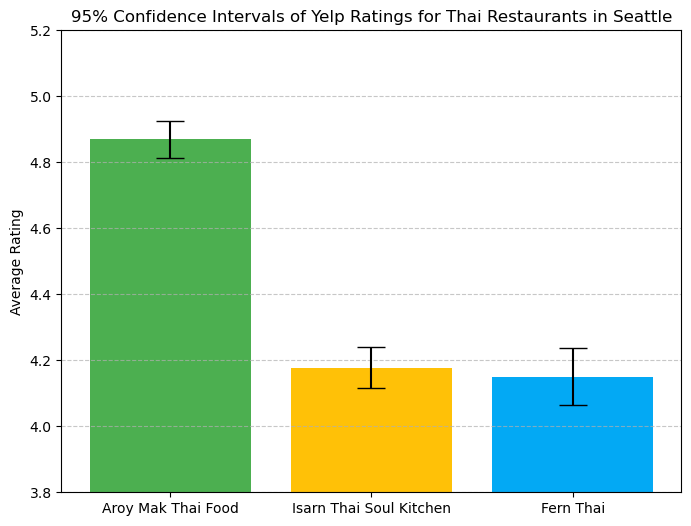

In [11]:
means = [np.mean(aroy_ratings), np.mean(isarn_thai_ratings), np.mean(fern_thai_ratings)]
cis_lower = [4.8142, 4.1152, 4.0630]
cis_upper = [4.9170, 4.2414, 4.2310]
errors = [mean - low for mean, low in zip(means, cis_lower)]

plt.figure(figsize=(8, 6))
plt.bar(restaurant_names, means, yerr=errors, capsize=10, color=['#4CAF50', '#FFC107', '#03A9F4'])
plt.ylabel('Average Rating')
plt.title('95% Confidence Intervals of Yelp Ratings for Thai Restaurants in Seattle')
plt.ylim(3.8, 5.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()